In [1]:
import numpy as np
import pandas as pd

In [2]:
df =pd.read_csv(r"C:\Users\Sonal Sarode\Downloads\train (1).csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [4]:
df.drop(['id','author','title'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20761 non-null  object
 1   label   20800 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 325.1+ KB


In [7]:
df.isna().sum()

text     39
label     0
dtype: int64

In [9]:
import plotly.express as px
import seaborn as sns


<Axes: xlabel='label', ylabel='count'>

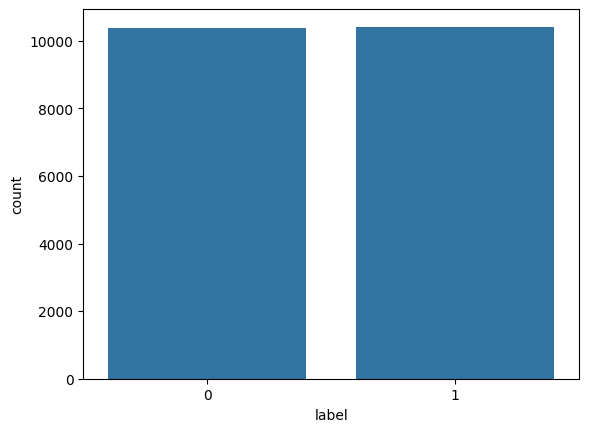

In [10]:
sns.countplot(data=df,x='label')

In [11]:
df =df.dropna()
df

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
...,...,...
20795,Rapper T. I. unloaded on black celebrities who...,0
20796,When the Green Bay Packers lost to the Washing...,0
20797,The Macy’s of today grew from the union of sev...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20761 entries, 0 to 20799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20761 non-null  object
 1   label   20761 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 486.6+ KB


In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
import re

In [22]:
def clean_text(txt):
    text = txt.lower()

    text = re.sub(r'[^a-z\s]', '', text)

    tokens=word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens =[word for word in tokens if word not in stop_words]

    ps= PorterStemmer()
    stemmed_words =[ps.stem(word) for word in tokens]

    cleaned_text = " ".join(stemmed_words)
    return cleaned_text

In [23]:
df['cleaned_text'] = df['text'].apply(clean_text)

C:\Users\Sonal Sarode\AppData\Local\Temp\ipykernel_24412\3867957871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['text'].apply(clean_text)


In [24]:
df['cleaned_text'][0]


'hous dem aid didnt even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ commonsbi licens apolog keith olbermann doubt worst person world weekfbi director jame comey accord hous democrat aid look like also know secondworst person well turn comey sent nowinfam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe didnt hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob cours know case comey actual say review email light unrel casewhich know anthoni weiner sext teenag appar littl

In [25]:
df['cleaned_text'][1]


'ever get feel life circl roundabout rather head straight line toward intend destin hillari clinton remain big woman campu leafi liber wellesley massachusett everywher els vote like inaugur dress remaind day way miss havisham forev wore wed dress speak great expect hillari rodham overflow year ago first address wellesley graduat class presid colleg inform gather student need debat far could ascertain spokesman kind like democrat primari minu term unknown even seven sister school glad miss adam made clear speak today us us miss rodham told classmat appoint edger bergen charli mccarthi mortim snerd attend bespectacl granni glass award matronli wisdom least john lennon wisdom took issu previou speaker despit becom first win elect seat u senat sinc reconstruct edward brook came critic call empathi goal protestor critic tactic though clinton senior thesi saul alinski lament black power demagogu elitist arrog repress intoler within new left similar word come republican necessit brief rebutt 

In [26]:
df

,text,label,cleaned_text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,hous dem aid didnt even see comey letter jason...
1,Ever get the feeling your life circles the rou...,0,ever get feel life circl roundabout rather hea...
2,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fire octob tension intellig an...
3,Videos 15 Civilians Killed In Single US Airstr...,1,video civilian kill singl us airstrik identifi...
4,Print \nAn Iranian woman has been sentenced to...,1,print iranian woman sentenc six year prison ir...
...,...,...,...
20795,Rapper T. I. unloaded on black celebrities who...,0,rapper unload black celebr met donald trump el...
20796,When the Green Bay Packers lost to the Washing...,0,green bay packer lost washington redskin week ...
20797,The Macy’s of today grew from the union of sev...,0,maci today grew union sever great name america...
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1,nato russia hold parallel exercis balkan press...


In [28]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=400,min_font_size=10,background_color='green')

In [29]:
fake_news = wc.generate(df[df['label']==1]['cleaned_text'].str.cat(sep=' '))


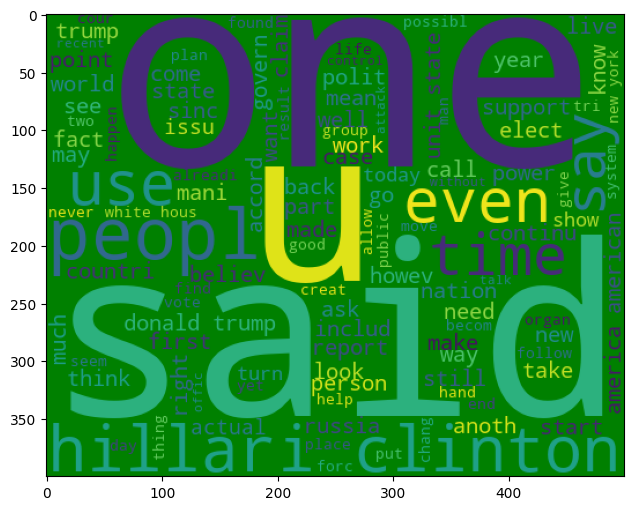

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.imshow(fake_news)

In [39]:
wc1 = WordCloud(width=500,height=400,min_font_size=10,background_color='pink')
real_news = wc1.generate(df[df['label']==0] ['cleaned_text'].str.cat(sep=' '))

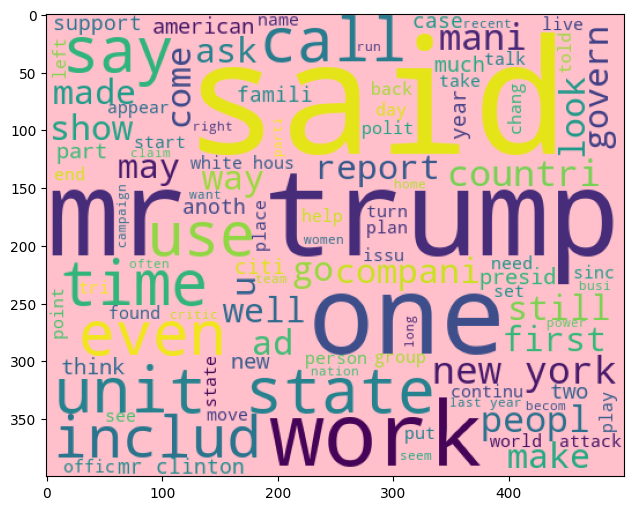

In [40]:
plt.figure(figsize=(15,6))
plt.imshow(real_news)

In [42]:
fake_news =[]
for i in df[df['label']==1]['cleaned_text'].tolist():
    for word in i.split():
        fake_news.append(word)

In [43]:
fake_news

['hous',
 'dem',
 'aid',
 'didnt',
 'even',
 'see',
 'comey',
 'letter',
 'jason',
 'chaffetz',
 'tweet',
 'darrel',
 'lucu',
 'octob',
 'subscrib',
 'jason',
 'chaffetz',
 'stump',
 'american',
 'fork',
 'utah',
 'imag',
 'courtesi',
 'michael',
 'jolley',
 'avail',
 'creativ',
 'commonsbi',
 'licens',
 'apolog',
 'keith',
 'olbermann',
 'doubt',
 'worst',
 'person',
 'world',
 'weekfbi',
 'director',
 'jame',
 'comey',
 'accord',
 'hous',
 'democrat',
 'aid',
 'look',
 'like',
 'also',
 'know',
 'secondworst',
 'person',
 'well',
 'turn',
 'comey',
 'sent',
 'nowinfam',
 'letter',
 'announc',
 'fbi',
 'look',
 'email',
 'may',
 'relat',
 'hillari',
 'clinton',
 'email',
 'server',
 'rank',
 'democrat',
 'relev',
 'committe',
 'didnt',
 'hear',
 'comey',
 'found',
 'via',
 'tweet',
 'one',
 'republican',
 'committe',
 'chairmen',
 'know',
 'comey',
 'notifi',
 'republican',
 'chairmen',
 'democrat',
 'rank',
 'member',
 'hous',
 'intellig',
 'judiciari',
 'oversight',
 'committe',
 'a

In [44]:
real_news =[]
for i in df[df['label']==0]['cleaned_text'].tolist():
    for word in i.split():
        real_news.append(word)

In [45]:
real_news


['ever',
 'get',
 'feel',
 'life',
 'circl',
 'roundabout',
 'rather',
 'head',
 'straight',
 'line',
 'toward',
 'intend',
 'destin',
 'hillari',
 'clinton',
 'remain',
 'big',
 'woman',
 'campu',
 'leafi',
 'liber',
 'wellesley',
 'massachusett',
 'everywher',
 'els',
 'vote',
 'like',
 'inaugur',
 'dress',
 'remaind',
 'day',
 'way',
 'miss',
 'havisham',
 'forev',
 'wore',
 'wed',
 'dress',
 'speak',
 'great',
 'expect',
 'hillari',
 'rodham',
 'overflow',
 'year',
 'ago',
 'first',
 'address',
 'wellesley',
 'graduat',
 'class',
 'presid',
 'colleg',
 'inform',
 'gather',
 'student',
 'need',
 'debat',
 'far',
 'could',
 'ascertain',
 'spokesman',
 'kind',
 'like',
 'democrat',
 'primari',
 'minu',
 'term',
 'unknown',
 'even',
 'seven',
 'sister',
 'school',
 'glad',
 'miss',
 'adam',
 'made',
 'clear',
 'speak',
 'today',
 'us',
 'us',
 'miss',
 'rodham',
 'told',
 'classmat',
 'appoint',
 'edger',
 'bergen',
 'charli',
 'mccarthi',
 'mortim',
 'snerd',
 'attend',
 'bespectacl',

In [46]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf =TfidfVectorizer(max_features=3000)

In [47]:
x =tfidf.fit_transform(df['cleaned_text']).toarray()

In [48]:

y=df['label'].values

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [51]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score

In [52]:
nb =GaussianNB()
mb=MultinomialNB()
ber =BernoulliNB()

In [53]:
nb.fit(x_train, y_train)
mb.fit(x_train, y_train)
ber.fit(x_train, y_train)

# Predictions
y_pred_nb = nb.predict(x_test)
y_pred_mb = mb.predict(x_test)
y_pred_ber = ber.predict(x_test)

# Evaluation
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_nb))
print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred_mb))
print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred_ber))

GaussianNB Accuracy: 0.844449795328678
MultinomialNB Accuracy: 0.8656392968938117
BernoulliNB Accuracy: 0.6922706477245365


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [55]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [56]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [57]:
def train_algo(clf,x_train,x_test,y_train,y_test):
    clf.fit(x_train,y_train)
    y_pred =clf.predict(x_test)
    accuracy =accuracy_score(y_test,y_pred)

    return accuracy

In [58]:
accuracies=[]
for i,clf in clfs.items():
    current_accuracy=train_algo(clf,x_train,x_test,y_train,y_test)
    print('for',i)
    print('Accuracy : ',current_accuracy)

    accuracies.append(current_accuracy)

for SVC
Accuracy :  0.9417288706958825
for KN
Accuracy :  0.6578377076811943
for NB
Accuracy :  0.8656392968938117
for DT
Accuracy :  0.8615458704550927
for LR
Accuracy :  0.9450999277630628
for RF
Accuracy :  0.9316156994943414
for AdaBoost
Accuracy :  0.9010353960992054
for BgC
Accuracy :  0.9308933301228028
for ETC
Accuracy :  0.910185408138695
for GBDT
Accuracy :  0.9135564652058753
for xgb
Accuracy :  0.950878882735372


In [59]:
fake_news

['hous',
 'dem',
 'aid',
 'didnt',
 'even',
 'see',
 'comey',
 'letter',
 'jason',
 'chaffetz',
 'tweet',
 'darrel',
 'lucu',
 'octob',
 'subscrib',
 'jason',
 'chaffetz',
 'stump',
 'american',
 'fork',
 'utah',
 'imag',
 'courtesi',
 'michael',
 'jolley',
 'avail',
 'creativ',
 'commonsbi',
 'licens',
 'apolog',
 'keith',
 'olbermann',
 'doubt',
 'worst',
 'person',
 'world',
 'weekfbi',
 'director',
 'jame',
 'comey',
 'accord',
 'hous',
 'democrat',
 'aid',
 'look',
 'like',
 'also',
 'know',
 'secondworst',
 'person',
 'well',
 'turn',
 'comey',
 'sent',
 'nowinfam',
 'letter',
 'announc',
 'fbi',
 'look',
 'email',
 'may',
 'relat',
 'hillari',
 'clinton',
 'email',
 'server',
 'rank',
 'democrat',
 'relev',
 'committe',
 'didnt',
 'hear',
 'comey',
 'found',
 'via',
 'tweet',
 'one',
 'republican',
 'committe',
 'chairmen',
 'know',
 'comey',
 'notifi',
 'republican',
 'chairmen',
 'democrat',
 'rank',
 'member',
 'hous',
 'intellig',
 'judiciari',
 'oversight',
 'committe',
 'a

In [69]:
new_test_sample_real = ["ever get feel life circl roundabout rather head straight line toward intend destin hillari clinton remain big woman campu leafi liber wellesley massachusett everywher els vote like inaugur dress remaind day way miss havisham forev wore wed dress speak great expect hillari rodham overflow year ago first address wellesley graduat class presid colleg inform gather student need debat far could ascertain spokesman kind like democrat primari minu term unknown even seven sister school glad miss adam made clear speak today us us miss rodham told classmat appoint edger bergen charli mccarthi mortim snerd attend bespectacl granni glass award matronli wisdom least john lennon wisdom took issu previou speaker despit becom first win elect seat u senat sinc reconstruct edward brook came critic call empathi goal protestor critic tactic though clinton senior thesi saul alinski lament black power demagogu elitist arrog repress intoler within new left similar word come republican necessit brief rebutt trust rodham iron observ one word ask class rehears want say everyon came said talk trust talk lack trust us way feel other talk trust bust say say feel permeat gener perhap even understood distrust trust bust certainli bust clinton plan certainli even understand peopl distrust whitewat travelg vast conspiraci benghazi miss email clinton found distrust voic friday load compromis road broaden polit horizon distrust american peopl trump edg percent percent question immedi prior novemb elect stood major reason close horizon clinton describ vanquish support embrac lie con altern fact assault truth reason fail explain american peopl chose lie truth histori major among today know well peopl power invent fact attack question mark begin end free societi offer hyperbol like mani peopl emerg hillari clinton embark upon long strang trip high school goldwat girl wellesley colleg republican presid democrat politician clinton drank time place gave degre significantli went idealist cynic comparison two wellesley commenc address show way back lament long leader view polit art possibl challeng practic polit art make appear imposs possibl big woman campu odd woman white hous wonder current station even possibl arent point ahead ask septemb may ask isnt presid woman famous dub congenit liar bill safir conclud lie mind get stood elect day like find jilt bride wed day inspir danger delus."]
new_test_sample_fake = ["Democrats Say They Learned of Comey Letter Through Chaffetz Tweet."]

# Transform using the same tfidf vectorizer
new_test_transformed = tfidf.transform(new_test_sample_real).toarray()
new_test_transformed_fake = tfidf.transform(new_test_sample_fake).toarray()

# Predict using the trained models
nb_pred_new = nb.predict(new_test_transformed_fake) #fake news
mb_pred_new = mb.predict(new_test_transformed_fake) #fake news
ber_pred_new = ber.predict(new_test_transformed) #real news
xgb_new = xgb.predict(new_test_transformed) #real news

print("GaussianNB Prediction:", nb_pred_new)
print("MultinomialNB Prediction:", mb_pred_new)
print("BernoulliNB Prediction:", ber_pred_new)
print('xgb : ',xgb_new)

GaussianNB Prediction: [1]
MultinomialNB Prediction: [1]
BernoulliNB Prediction: [0]
xgb :  [0]
